<a href="https://colab.research.google.com/github/ibrahimyrao/data-visualization/blob/main/datav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display


data_url = 'https://drive.google.com/uc?export=download&id=1AY5xAeQUyAVZnIR2ZfKW7YN1x8q4VxuX'  # Updated URL

# Download the file content using requests
response = requests.get(data_url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the content into a Pandas DataFrame
dataset = pd.read_csv(StringIO(response.text))

dataset.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [11]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'dataset' is your DataFrame and 'date' is the column with dates
# Convert the 'date' column to datetime objects if it's not already
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract the month from the 'date' column
dataset['month'] = dataset['date'].dt.month

# Group by month and count sales for total sales count
monthly_sales_count = dataset.groupby(dataset['date'].dt.month)['money'].count()

# Ensure all months are represented (fill missing months with 0 sales)
monthly_sales_count = monthly_sales_count.reindex(range(1, 13), fill_value=0)

# Create a bar chart with hover text
fig = go.Figure(
    data=[go.Bar(
        x=monthly_sales_count.index,
        y=[0]*len(monthly_sales_count),  # Start with zero height for the bars
        text=monthly_sales_count.values,  # Text to display inside bars on hover
        textposition='none',        # Disable text inside bars
        hoverinfo='text',           # Enable custom hover info
        hovertemplate='Total Sales Count: %{text}<extra></extra>',  # Custom hover template
        marker_color='rgb(158,202,225)'  # Initial bar color
    )]
)

# Add an animation frame for each month with the actual data
frames = [go.Frame(
    data=[go.Bar(
        x=monthly_sales_count.index,
        y=monthly_sales_count.iloc[:i+1],  # Incremental data for animation
        text=monthly_sales_count.iloc[:i+1],  # Text for hover
        marker_color='rgb(158,202,225)'
    )],
    name=f"Frame {i}"
) for i in range(len(monthly_sales_count))]

# Ensure the final frame includes all months (even those with zero sales)
frames.append(go.Frame(
    data=[go.Bar(
        x=monthly_sales_count.index,
        y=monthly_sales_count,  # Use all months
        text=monthly_sales_count,  # Text for hover
        marker_color='rgb(158,202,225)'
    )],
    name="Final Frame"
))

fig.frames = frames

# Update layout for better presentation and animation
fig.update_layout(
    title='Monthly Total Sales Count',
    xaxis_title='Month',
    yaxis_title='Total Sales Count',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        fixedrange=True  # Disable zoom on x-axis
    ),
    yaxis=dict(fixedrange=True),  # Disable zoom on y-axis
    showlegend=False,  # Disable legend for clarity
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Show the figure
fig.show()

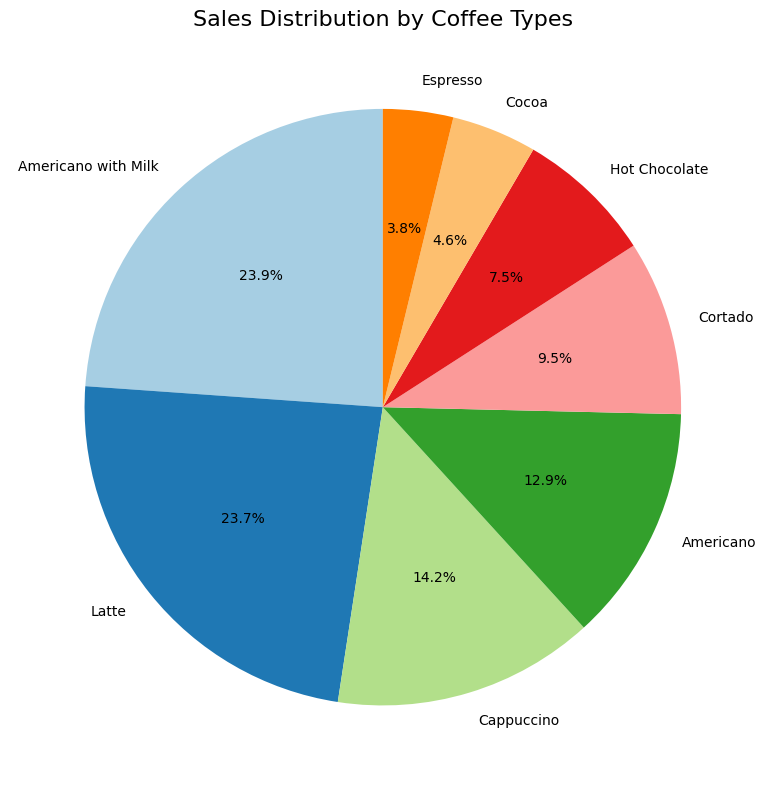

In [12]:
# Grouping sales by coffee types
coffee_sales = dataset['coffee_name'].value_counts()

# Creating the pie chart
plt.figure(figsize=(10, 8))
coffee_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Graph Titles
plt.title("Sales Distribution by Coffee Types", fontsize=16)
plt.ylabel("")  # Removing the Y label

# Visualization
plt.tight_layout()
plt.show()

In [8]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Assuming 'dataset' has columns 'coffee_name' and 'money' representing coffee names and sales amount respectively

# Find the coffee with the highest total sales
highest_sales_coffee = dataset.groupby('coffee_name')['money'].sum().idxmax()
highest_sales_value = dataset.groupby('coffee_name')['money'].sum().max()

# Calculate the sales count and total sales for each coffee
coffee_sales = dataset.groupby('coffee_name')['money'].agg(['count', 'sum'])

# Create bins for the histogram
bin_edges = np.histogram(dataset['money'], bins=20)[1]

# Create the initial bar values and bins
monthly_sales_count = dataset.groupby(dataset['money']).size()
bins = np.histogram(dataset['money'], bins=20)[1]

# Create the histogram figure
fig = go.Figure()

# Create histogram for the first frame (empty bars)
fig.add_trace(go.Histogram(
    x=dataset['money'],
    nbinsx=20,
    marker_color='orange',
    name="Sales Amounts",
    hoverinfo='text',  # Show text on hover
    # Add more detailed information in hover text
    text=[
    f"Coffee: {coffee_name}<br>Count: {coffee_sales.loc[coffee_name, 'count']}<br>Total Sales: £{coffee_sales.loc[coffee_name, 'sum']:.2f}"
    for coffee_name in dataset['coffee_name']
    ],
    textposition='none',  # Hide text inside the bars
    cumulative_enabled=False  # Ensure we are not using cumulative mode
))

# Update the layout with a smooth transition
fig.update_layout(
    title="Distribution of Sales Amounts",
    xaxis_title="Sales Amount (£)",
    yaxis_title="Quantity",
    template="plotly_white",
    dragmode='zoom',
    xaxis=dict(range=[15, bins[-1]]),  # Start the x-axis from 15
)

# Show the figure
fig.show()

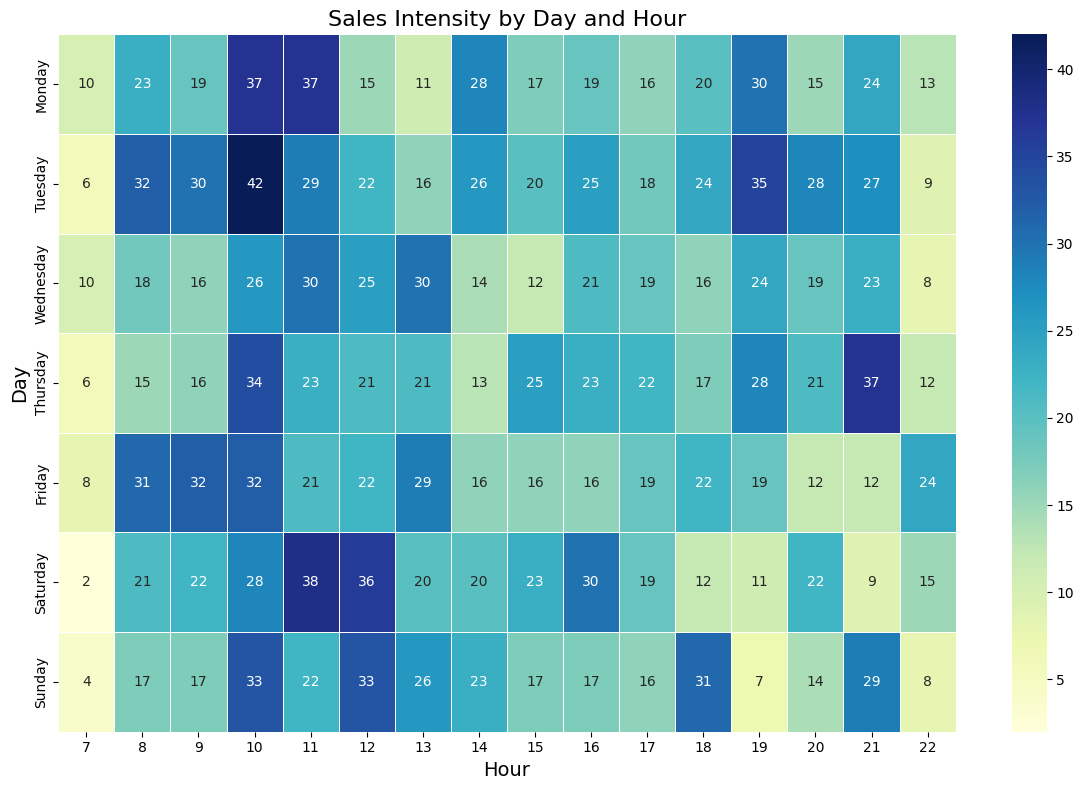

In [9]:
# Heatmap Showing Sales Intensity by Day and Hour
# First, extracting hour and day information from the datetime column
dataset['hour'] = pd.to_datetime(dataset['datetime']).dt.hour
dataset['day'] = pd.to_datetime(dataset['datetime']).dt.day_name()

# Grouping the number of transactions by hour and day
heatmap_data = dataset.groupby(['day', 'hour']).size().unstack(fill_value=0)

# Setting the order for days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d', linewidths=0.5)

# Chart Titles and Labels
plt.title("Sales Intensity by Day and Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Day", fontsize=14)

# Visualization
plt.tight_layout()
plt.show()

In [10]:
# Calculating daily total sales
daily_sales = dataset.groupby('date')['money'].sum()

# X and Y axis data for the chart
x = daily_sales.index
y = daily_sales.values

# Zoom chart (plotly)
fig = go.Figure()

# Adding line chart
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Sales Amount'))

# Title and axis labels
fig.update_layout(
    title="Daily Sales",
    xaxis_title="Date",
    yaxis_title="Total Sales Amount (TL)",
    xaxis_rangeslider_visible=True,  # Enable range slider for zooming
    template="plotly_dark"  # Visual style for the chart
)

# Visualization
fig.show()